In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
trees = gpd.read_file("paris_trees_small.gpkg")
districts = gpd.read_file("paris_districts_utm.geojson")
print(trees.info())
print("\n\n",districts.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7856 entries, 0 to 7855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   species        7834 non-null   object  
 1   location_type  7856 non-null   object  
 2   geometry       7856 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 184.2+ KB
None
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             80 non-null     int64   
 1   district_name  80 non-null     object  
 2   population     80 non-null     int64   
 3   geometry       80 non-null     geometry
dtypes: geometry(1), int64(2), object(1)
memory usage: 2.6+ KB


 None


## How many trees are in each district?
### Since not all the districts are the same in terms of space, let's get an number that represents the trees relative to space.

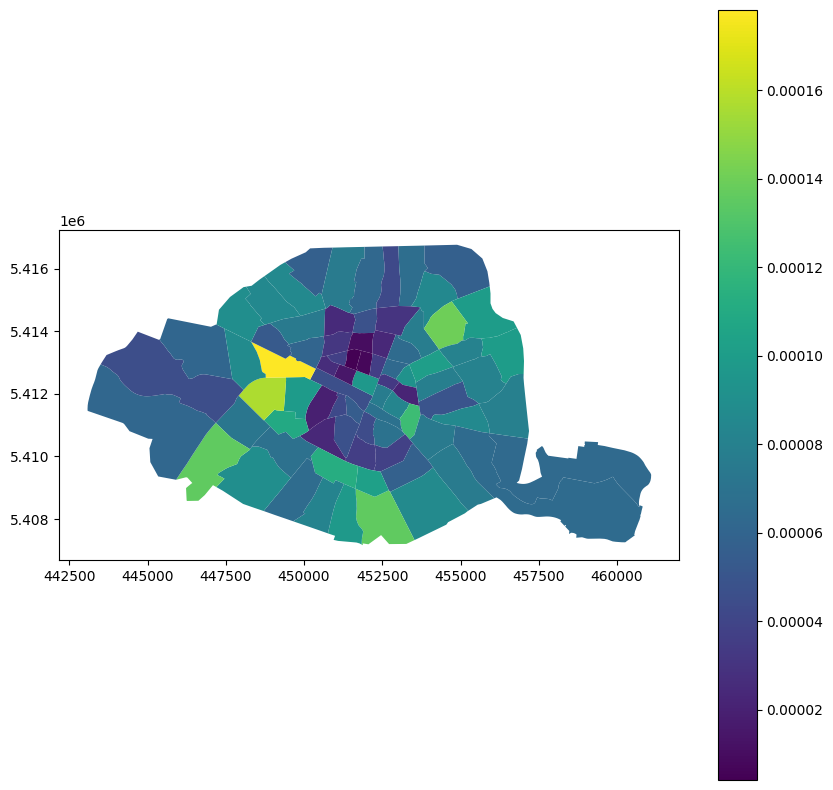

In [3]:
trees_by_districts = gpd.sjoin(trees, # The data you want to get information into. 
                              districts,
                              predicate = 'within') # The order matters! you can use 'op' instead of predicate.

districts_trees_n = trees_by_districts.groupby('district_name')['id'].count().to_frame(name = 'n_trees').reset_index()
districts_trees = pd.merge(districts , districts_trees_n , on = 'district_name')
districts_trees['trees_per_area'] = districts_trees['n_trees'] / districts_trees.geometry.area
districts_trees.plot(column = 'trees_per_area',figsize = (10,10),legend = True)
plt.show()